# Concrete Strength Prediction and Regression
----
In this interactive Jupyter notebook, we will investigate our given concrete dataset to see if we can perform any forms of regression in order to fit a model to predict the strength of concrete based on its composition and age. This dataset comes directly from [Kaggle](https://www.kaggle.com/maajdl/yeh-concret-data), and contains a variety of features whose descriptions can be read either on the website or at this project's [README](README.md) file.

## Data Preparation
To start, we should probably prepare our data for analysis and regression. We will first import our required libraries.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

Moreover we may want some tools for data exploration and visualization.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
sns.set_context('talk')

Let's now read in our dataset from the [`data`](./data/) folder using Pandas, and begin to explore the relationships between the features.

In [3]:
data = pd.read_csv('data/concrete_data.csv')
data.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


Let's also check the information panel for our dataframe to see if we have any null values that need cleaning.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement              1030 non-null float64
slag                1030 non-null float64
flyash              1030 non-null float64
water               1030 non-null float64
superplasticizer    1030 non-null float64
coarseaggregate     1030 non-null float64
fineaggregate       1030 non-null float64
age                 1030 non-null int64
csMPa               1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


It looks as though we do not have any null values that need to be handled, and moreover all of our types seem to already be appropriately cast. In particular, we don't want any of these features being represented by strings or non-numeric types as they are all quantitative measurements. We can also check the description page for some statistics.

In [5]:
data.describe()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


We can also try some visualizations to see if there are any obvious relationships between our features.

In [6]:
X = data.iloc[:,:-1]
y = data.csMPa

In [7]:
feature_correlation_table = X.corr()

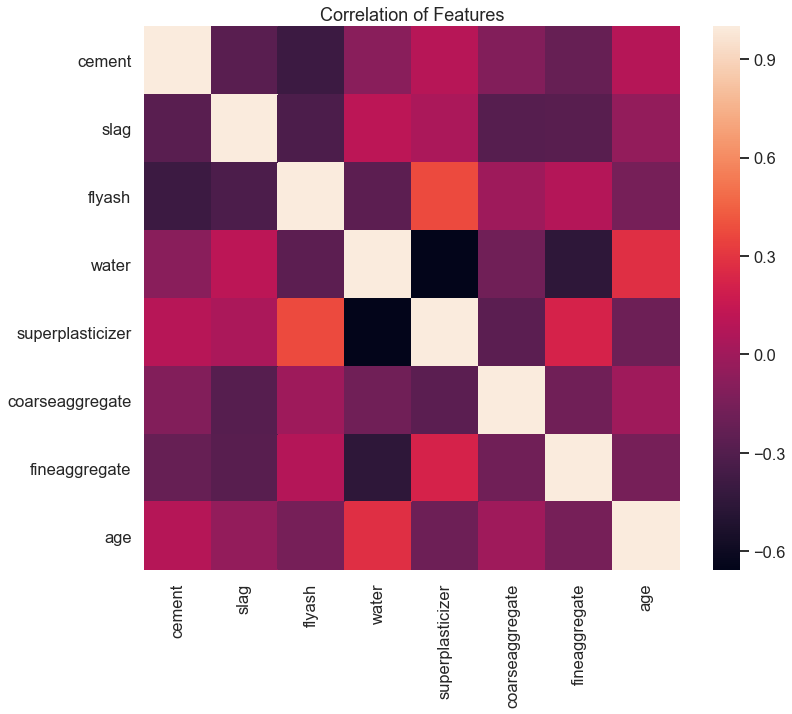

In [8]:
f, hm = plt.subplots(figsize=(12, 10));
sns.heatmap(feature_correlation_table, ax=hm);
hm.set_title('Correlation of Features');

These honestly all look generally uncorrelated enough to continue forward. We can test to see if there are any obvious visual relationships with a seaborn pairplot of the features.

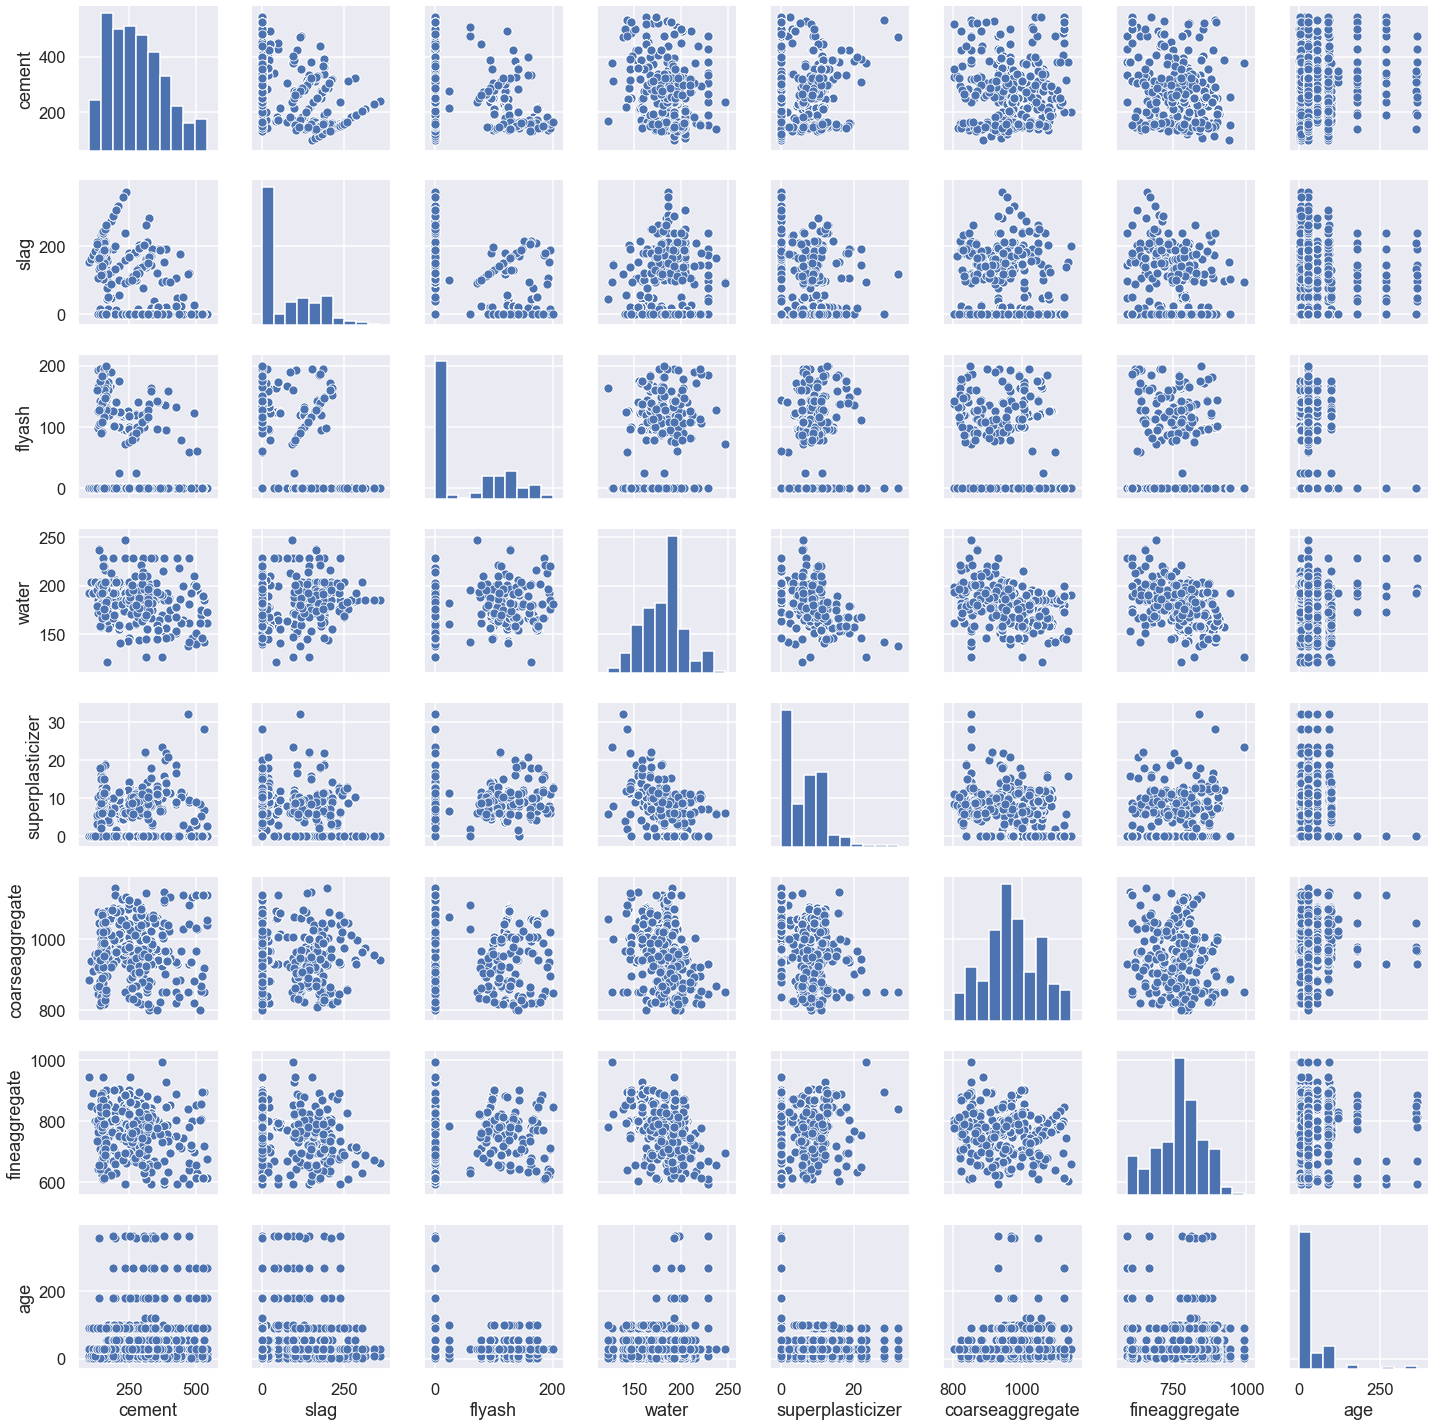

In [9]:
pairplot = sns.pairplot(X);

In [10]:
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [11]:
scaler = StandardScaler()

In [12]:
x_train_norm = scaler.fit_transform(x_train)

In [13]:
x_val_norm = scaler.transform(x_val)

## Support Vector Regression
Let's try using some support vector machines to perform regression on this dataset.

In [14]:
from sklearn.svm import SVR

In [15]:
svr = SVR(cache_size=1000, max_iter=2000)
svr.get_params()

{'C': 1.0,
 'cache_size': 1000,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': 2000,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [16]:
param_grid = {
    'C': 10**np.arange(-4.0, 5.0, 0.5),
    'gamma': ['auto', 'scale'],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'degree': np.arange(2, 8, 1),
    'epsilon': 10**np.arange(-3.0, 4.0, 1.0),
    'tol': 10**np.arange(-3.0, 4.0, 1.0)
}

In [17]:
param_grid

{'C': array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
        1.00000000e-02, 3.16227766e-02, 1.00000000e-01, 3.16227766e-01,
        1.00000000e+00, 3.16227766e+00, 1.00000000e+01, 3.16227766e+01,
        1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
        1.00000000e+04, 3.16227766e+04]),
 'gamma': ['auto', 'scale'],
 'kernel': ['rbf', 'poly', 'sigmoid'],
 'degree': array([2, 3, 4, 5, 6, 7]),
 'epsilon': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'tol': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [18]:
svr_grid_search = GridSearchCV(svr, param_grid, n_jobs=-1, cv=3)

In [19]:
svr_grid_search.fit(x_train_norm, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
//anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=1000, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=2000, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000000e-04, 3.16227766e-04, 1.00000000e-03, 3.16227766e-03,
       1.00000000e-02, 3.16227766e-02, 1.000000...
       1.00000000e+02, 3.16227766e+02, 1.00000000e+03, 3.16227766e+03,
       1.00000000e+04, 3.16227766e+04]),
                         'degree': array([2, 3, 4, 5, 6, 7]),
                         'epsilon': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'gamma': ['auto', 'scale'],
                         'kernel': ['rbf', 'poly', 'sigmoid'],
                         'tol': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])},
        

In [20]:
svr_grid_search.best_score_

0.861057776618634

In [21]:
svr_grid_search.best_estimator_

SVR(C=316.22776601683796, cache_size=1000, coef0=0.0, degree=2, epsilon=1.0,
    gamma='scale', kernel='rbf', max_iter=2000, shrinking=True, tol=0.001,
    verbose=False)

Let's test our validation set as well.

In [22]:
svr_grid_search.score(x_val_norm, y_val)

0.8424407894500736

Look's pretty solid, given the circumstances. Further investigation will entail trying to increase the accuracy of our model by using other classification systems or a full chain of classification systems.

In [23]:
svr_results_df = pd.DataFrame(svr_grid_search.cv_results_)
svr_results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_epsilon,param_gamma,param_kernel,param_tol,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.022899,0.004902,0.007356,0.000527,0.0001,2,0.001,auto,rbf,0.001,"{'C': 0.0001, 'degree': 2, 'epsilon': 0.001, '...",-0.002053,0.000172,-0.032089,-0.011298,0.014703,10144
1,0.045855,0.011683,0.022438,0.007986,0.0001,2,0.001,auto,rbf,0.01,"{'C': 0.0001, 'degree': 2, 'epsilon': 0.001, '...",-0.002053,0.000172,-0.032088,-0.011298,0.014702,10132
2,0.052761,0.001432,0.017107,0.002448,0.0001,2,0.001,auto,rbf,0.1,"{'C': 0.0001, 'degree': 2, 'epsilon': 0.001, '...",-0.002053,0.000172,-0.032340,-0.011382,0.014821,10204
3,0.033822,0.004624,0.015903,0.004490,0.0001,2,0.001,auto,rbf,1,"{'C': 0.0001, 'degree': 2, 'epsilon': 0.001, '...",-0.002053,-0.000670,-0.039589,-0.014073,0.018018,10603
4,0.028887,0.005577,0.011893,0.006513,0.0001,2,0.001,auto,rbf,10,"{'C': 0.0001, 'degree': 2, 'epsilon': 0.001, '...",-0.021515,-0.011546,-0.067838,-0.033592,0.024513,11026


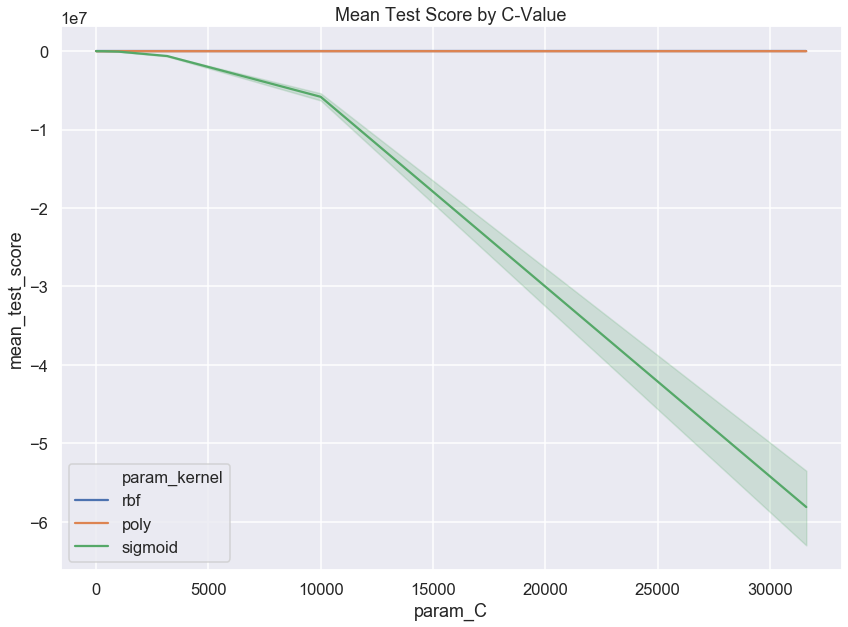

In [24]:
f, ax = plt.subplots(figsize=(14, 10))
sns.lineplot(x='param_C', y='mean_test_score', hue='param_kernel', data=svr_results_df, ax=ax);
ax.set_title('Mean Test Score by C-Value');

Clearly the sigmoid kernel did very badly, so let's remove it from our visualization to get a better plot.

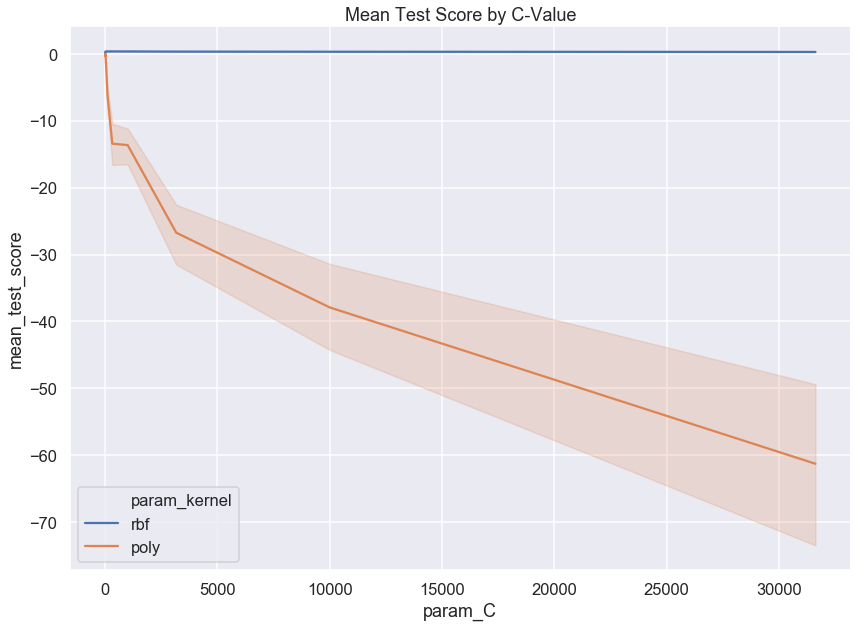

In [25]:
f, ax = plt.subplots(figsize=(14, 10))
sns.lineplot(
    x='param_C',
    y='mean_test_score',
    hue='param_kernel',
    data=svr_results_df.loc[svr_results_df.param_kernel != 'sigmoid'],
    ax=ax);
ax.set_title('Mean Test Score by C-Value');

## Gaussian Process Regression
In this next example we will investigate a simple implementation of a Gaussian Process Regression model on the data. This is implemented in scikit-learn, as usual, in the `gaussian_process` module.

In [26]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [27]:
gpr = GaussianProcessRegressor(normalize_y=True)

In [28]:
gpr.get_params()

{'alpha': 1e-10,
 'copy_X_train': True,
 'kernel': None,
 'n_restarts_optimizer': 0,
 'normalize_y': True,
 'optimizer': 'fmin_l_bfgs_b',
 'random_state': None}

In [29]:
param_grid = {
    'alpha': 10**np.arange(-4.0, 5.0, 1.0),
    'n_restarts_optimizer': np.arange(0, 100, 10)
}

In [30]:
gpr_grid_search = GridSearchCV(gpr, param_grid, n_jobs=-1, cv=5)

In [31]:
gpr_grid_search.fit(x_train_norm, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                                                kernel=None,
                                                n_restarts_optimizer=0,
                                                normalize_y=True,
                                                optimizer='fmin_l_bfgs_b',
                                                random_state=None),
             iid='warn', n_jobs=-1,
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04]),
                         'n_restarts_optimizer': array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [32]:
gpr_grid_search.best_score_

0.856498993853795

In [33]:
gpr_grid_search.best_estimator_

GaussianProcessRegressor(alpha=0.01, copy_X_train=True, kernel=None,
                         n_restarts_optimizer=0, normalize_y=True,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [34]:
gpr_grid_search.score(x_val_norm, y_val)

0.8634673420151243

## Decision Tree Regression
In this section of the notebook we will also investigate a decision tree regression model. Let's start by importing the needed modules from sklearn.

In [35]:
from sklearn.tree import DecisionTreeRegressor

In [36]:
dtr = DecisionTreeRegressor()
dtr.get_params()

{'criterion': 'mse',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [37]:
param_grid = {
    'criterion': ['mse', 'friedman_mse', 'mae'],
    'max_depth': [None] + list(np.arange(10, 100, 10)),
    'min_samples_leaf': np.arange(1, 20, 1),
    'min_samples_split': np.arange(2, 20, 2),
    'min_weight_fraction_leaf': np.arange(0.0, 0.5, 0.1)
}

In [38]:
dtr_grid_search = GridSearchCV(dtr, param_grid, n_jobs=-1, cv=5)

In [39]:
dtr_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid=...terion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 30, 40, 50, 60, 70, 80,
                                       90],
                         

In [40]:
dtr_grid_search.best_score_

0.8276450110515845

In [41]:
dtr_grid_search.best_estimator_

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [42]:
dtr_grid_search.score(x_val, y_val)

0.8639167854475807

----
## Introducing Ensemble Methods - Gradient Boosting Regression
We can also investigate to see if any ensemble classification methods will provide a more substantial accuracy than what is offered by any of the above single classifiers. In particular, we will investigate in this section gradient boosting regression.

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

In [44]:
gbr = GradientBoostingRegressor()
gbr.get_params()

{'alpha': 0.9,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [45]:
param_grid = {
    'n_estimators': np.arange(50, 1050, 50),
    'alpha': np.arange(0.1, 1.0, 0.1),
    'tol': 10**np.arange(-2.0, 3.0, 1.0)
}

In [46]:
gbr_grid_search_cv = GridSearchCV(gbr, param_grid, cv=5, n_jobs=-1)

In [47]:
gbr_grid_search_cv.fit(x_train_norm, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingRegressor(alpha=0.9,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter...
                             

In [48]:
gbr_grid_search_cv.best_score_

0.924429592634909

In [49]:
gbr_grid_search_cv.best_estimator_

GradientBoostingRegressor(alpha=0.2, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=800,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=10.0,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [50]:
gbr_grid_search_cv.score(x_val_norm, y_val)

0.935353024335888

That is some freaking high accuracy on the validation set! We should definitely try some plotting to see if we can get interesting visualizations, etc.

In [51]:
gbr_param_search_results = pd.DataFrame(gbr_grid_search_cv.cv_results_)
gbr_param_search_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_n_estimators,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.049777,0.008862,0.001675,0.000280,0.1,50,0.01,"{'alpha': 0.1, 'n_estimators': 50, 'tol': 0.01}",0.881344,0.890407,0.875293,0.858657,0.859109,0.872979,0.012461,893
1,0.074108,0.021577,0.001560,0.000038,0.1,50,0.1,"{'alpha': 0.1, 'n_estimators': 50, 'tol': 0.1}",0.881344,0.890430,0.875293,0.858733,0.858771,0.872931,0.012525,898
2,0.045961,0.001048,0.001606,0.000017,0.1,50,1,"{'alpha': 0.1, 'n_estimators': 50, 'tol': 1.0}",0.881344,0.890407,0.875293,0.858773,0.859052,0.872991,0.012447,892
3,0.047229,0.002722,0.001674,0.000149,0.1,50,10,"{'alpha': 0.1, 'n_estimators': 50, 'tol': 10.0}",0.881344,0.890678,0.875549,0.858586,0.859339,0.873116,0.012512,860
4,0.047961,0.004115,0.001623,0.000102,0.1,50,100,"{'alpha': 0.1, 'n_estimators': 50, 'tol': 100.0}",0.881344,0.890516,0.875549,0.858804,0.859052,0.873070,0.012480,875


From our parameters of the best found estimator, we can see that the optimal number of estimators found by our grid search was 950. Let's consider a visualization of the mean test score for this number of estimators, to see how the model seems to repsond to perturbations in the other parameters. The optimal parameter alpha was found using our search to be 0.9, and the optimal tolerance parameter was found to be 100. Let's subset our data to investigate a line plot.

In [52]:
gbr_optimal_alpha_tol = gbr_param_search_results.loc[
    (gbr_param_search_results.param_alpha == 0.9)
    & (gbr_param_search_results.param_tol == 100)]
gbr_optimal_alpha_tol.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_n_estimators,param_tol,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
804,0.047605,0.002668,0.001607,0.000040,0.9,50,100,"{'alpha': 0.9, 'n_estimators': 50, 'tol': 100.0}",0.881344,0.890407,0.875549,0.858657,0.858821,0.872973,0.012535,894
809,0.090866,0.002388,0.001870,0.000023,0.9,100,100,"{'alpha': 0.9, 'n_estimators': 100, 'tol': 100.0}",0.911282,0.915130,0.903684,0.894141,0.887464,0.902358,0.010326,822
814,0.129260,0.001359,0.002064,0.000052,0.9,150,100,"{'alpha': 0.9, 'n_estimators': 150, 'tol': 100.0}",0.922581,0.921837,0.913635,0.905817,0.898233,0.912438,0.009355,780
819,0.170625,0.006525,0.002288,0.000061,0.9,200,100,"{'alpha': 0.9, 'n_estimators': 200, 'tol': 100.0}",0.928706,0.925900,0.917736,0.911887,0.901484,0.917162,0.009825,751
824,0.212143,0.003024,0.002518,0.000014,0.9,250,100,"{'alpha': 0.9, 'n_estimators': 250, 'tol': 100.0}",0.933164,0.929217,0.920086,0.917257,0.903691,0.920704,0.010279,691


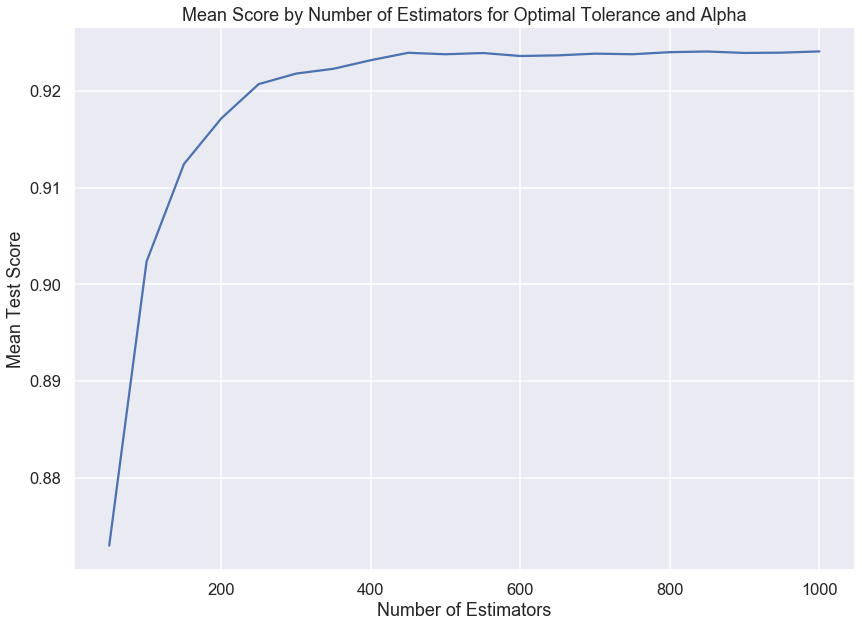

In [53]:
f, ax = plt.subplots(figsize=(14, 10));
sns.lineplot(x='param_n_estimators', y='mean_test_score', data=gbr_optimal_alpha_tol, ax=ax);
ax.set_title('Mean Score by Number of Estimators for Optimal Tolerance and Alpha');
ax.set_xlabel('Number of Estimators');
ax.set_ylabel('Mean Test Score');